# 1 Problem Motivation

## 1.1 Project Outline
In this project, we use computational techniques to explain the behaviour of a system of ordinary differential equations (ODEs). Working through the computational analysis required to visualise the swinging Atwood System, we are able to investigate the different types of behaviour depending on specific variables.

# 2 Problem Details

## 2.1 Introduction
The Swinging Atwood System is made up of two masses that are connected by an inextensible, massless string over two frictionless pulleys of zero radius. The mass (m) is a simple pendulum and the counterweight has a mass (M) that is greater than m. The pendulum can swing freely without colliding with the counterweight, but the counterweight is restricted to only being able to move up and down. The system is an example of a complex harmonic oscillator, which is chaotic for some system parameters and initial conditions.
```
Figure 1, diagram of the Atwood system (Swinging Atwood's machine - Wikipedia, n.d.): 
```
<img src="Untitled.png" width="300"/>
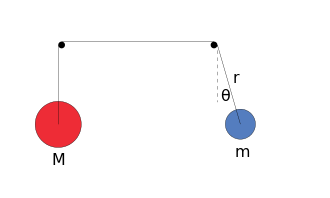

# 3 Finding a way into the Problem

## 3.1 The Plan
Instead of directly computing the complex harmonic oscillator system that is Atwood, we started with a more familiar system; the simple harmonic pendulum. It is a type of harmonic oscillation that will continue indefinitely if not inhibited by dissipations such as friction.

## 3.2 Simple Pendulum
### 3.2.1 Required Packages

To model dynamic systems like the simple pendulum and the Atwood system we require three packages ; Numpy as np to perform a wide variety of mathematical operations on arrays, matplotlib.pyplot as plt to allow us to plot our results and from scipy.integrate import odeint to allow us to solve ODEs.

```
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
```

### 3.2.2 The Simple Pendulum ODE problem

$$\frac{d^2θ}{dt²} = - gsin(θ) / L$$

Where :
- θ (radians) is the angle of displacement of the pendulum from the line of vertical 
- $g$ ($m/s^2$) is the acceleration due to gravity 
- $L$ (metres) is the fixed length of the inextensible string
- $t$ (seconds) is time taken from release of pendulum from rest 

```
Figure 2, diagram of the simple pendulum system (Using Pysketcher to Create Principal Sketches of Physics Problems, n.d.): 
```

<img src="sketch of simple pendulum.png" width="200"/>


Simple Harmonic Motion (SHM) second order ODE of a simple pendulum: $$ θ''(t) = -\frac{g}{L}(sin(θ)) $$

We convert the SHM second order ODE of a simple pendulum into a first order ODE by defining $θ'(t)=ω(t) $ . This needs to be done as odeint can only solve first order ODEs. We don't need to put $sin(θ)$ in terms of $ω$ as we have already defined their relationship.

This gives us the two coupled ODEs:

$$θ'(t)=ω(t) $$
$$ω'(t) = -\frac{g}{L}(sin(θ))$$ 

We let $y$ be $θ$ and $ω$ so that we can solve for these values, and in turn solve the second order ODE.

```
def model(y,t,g,L):
    θ, ω = y
    dydt = [ω, -(g/L)*(np.sin(θ))]
    return dydt
```
This finds our new ODE for us by calculating the derivative of $θ$ and $ω$.
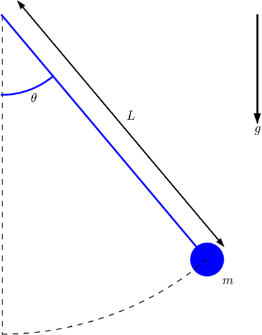
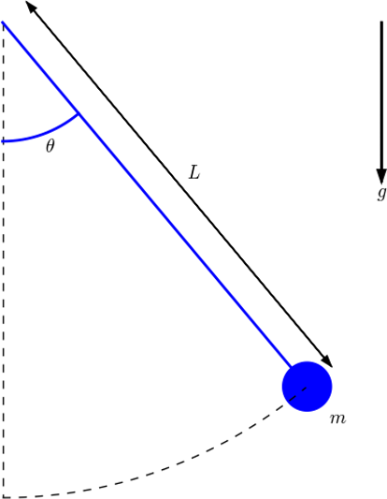
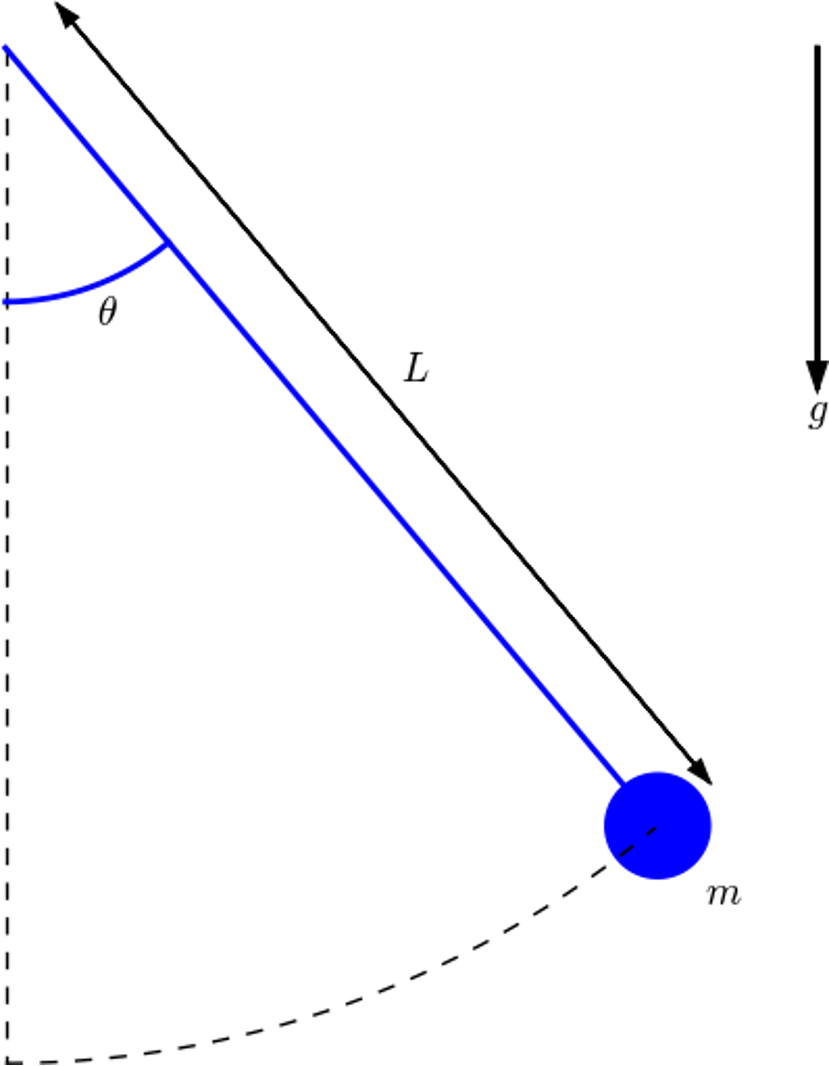

### 3.2.3 Inital Conditions

Here we set $g = 9.81 m/s^2$ as this is its real (rounded) value. We also set $L=2$ metres as our own set condition that we will change in a later investigation in this notebook.

```
g = 9.81
L = 2
```

We then go on to set our inital $θ$ and $ω$ through $y$. We also set the evenly spaced timepoints at which our data points are collected using the linspace function. The code takes 101 data points between 0 to 10 seconds.

```
y_0 = [0-0.1,0.0]
t = np.linspace(0,10,101)
```

### 3.2.4 Plotting Results: (introducing phase plots)

To finish we solve the model using the odient function and plot the results in a phase plot (see below). 
```
sol = odeint(model, y0, t, args=(g,L))
plt.plot(sol[:,0], sol[:, 1], 'b')
plt.ylabel('Angular velocity')
plt.xlabel('Angular displacement')
plt.grid()
plt.show()
```
A phase plot is a representation of the trajectories of a dynamical system in the phase plane, therefore the ideal kind of plot to express the movement of a pendulum. There is no clear start or end point and the plot is symmetrical, so the pendulum will follow a repeated route in equals intervals of time. This means that the phase plot shows periodic motion.

```
Figure 3, simple pendulum system phase plot: 
```

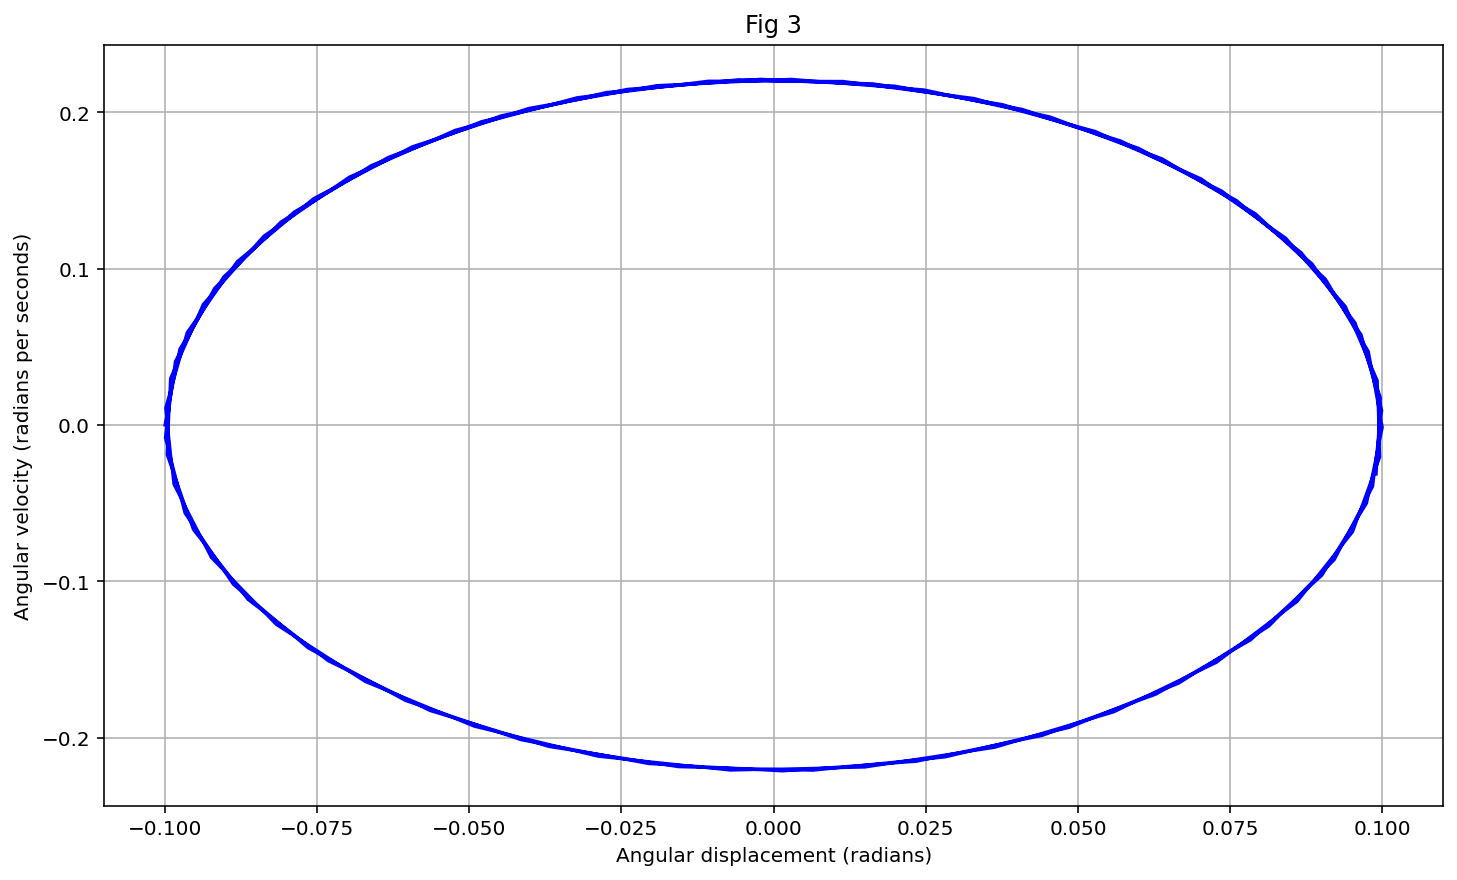

In [1]:
import simplependulumphaseplot

A phase plot is the best way to interpret the motion of dynamical systems. The other options would be the angular displacement and the angular velocity plotted against time, shown below
.

```
Figure 4, time/angular velocity plot of a simple pendulum system: 
```

<img src="simple pendulum fig 4.png" width="700"/>

```
Figure 5, time/angular displacement of a simple pendulum system: 
```

<img src="fig 5.png" width="700"/>

Even if both those graphs show the periodic motion of the pendulum, there is a piece of information missing in both graphs. The first one informs us of the speed of the pendulum, without any information about its location in space. The second one is a bit more precise, as we could easily calculate the speed as we have the displacement as well as the time. However, the phase plot is more precise as it indicates the speed and the displacement of the pendulum, as well as its direction.
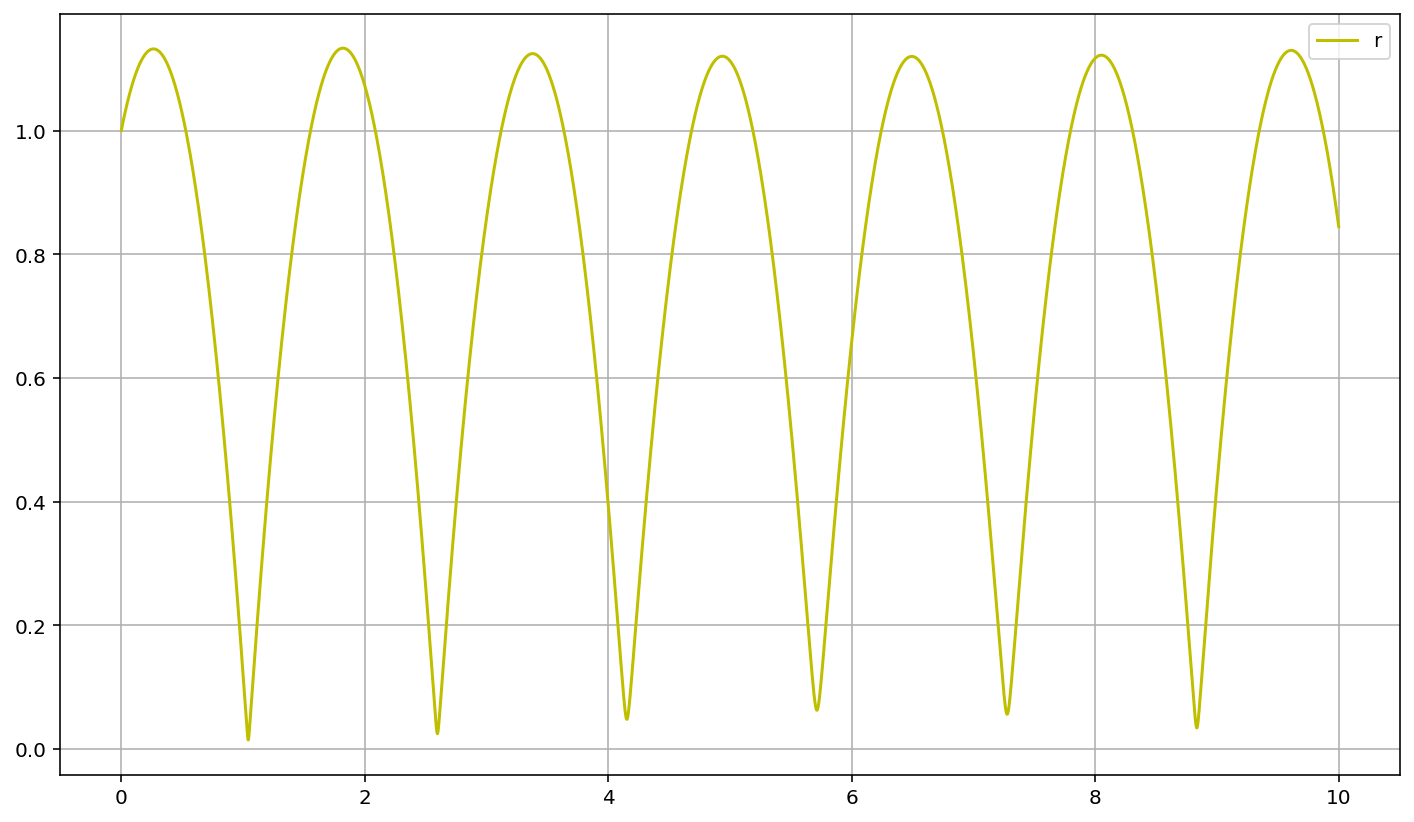
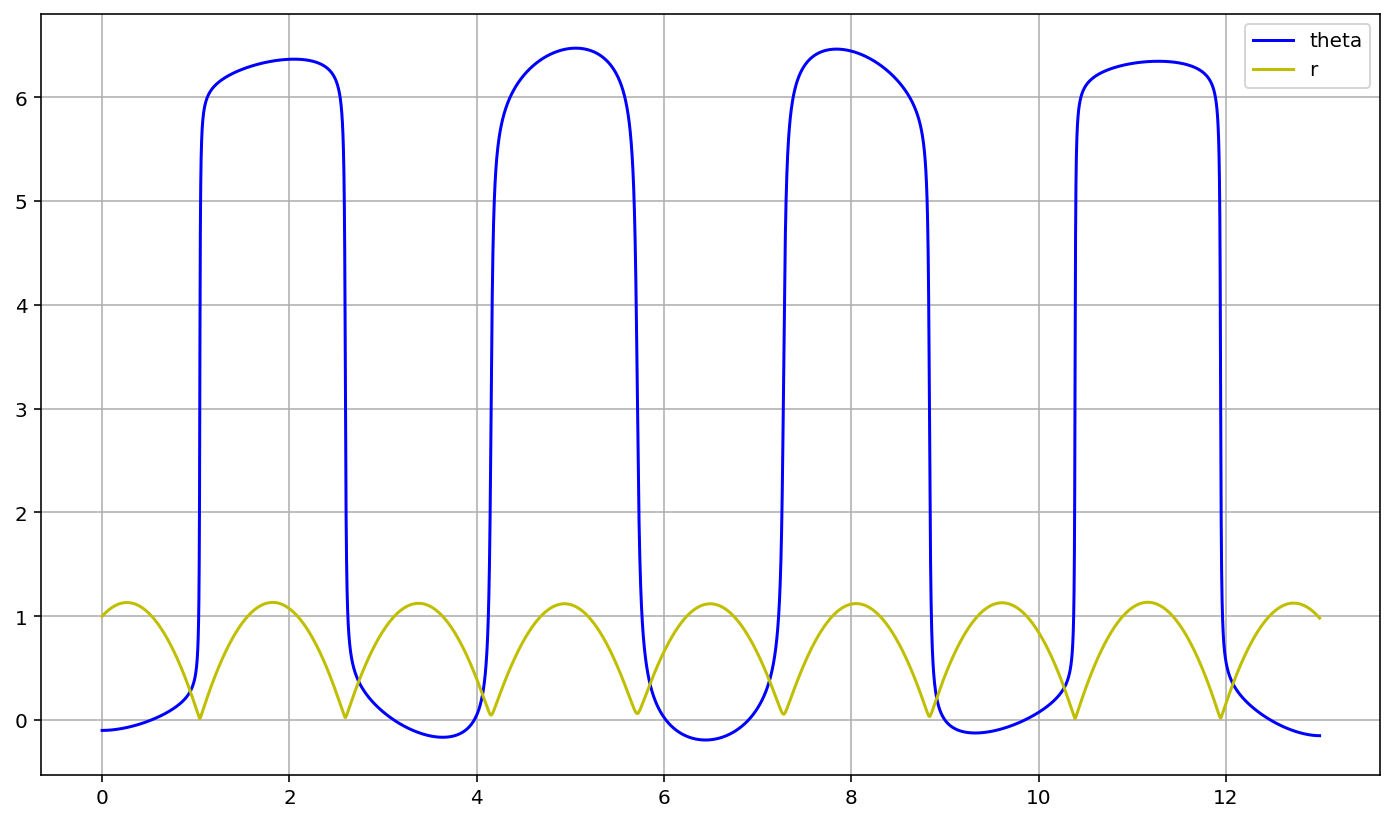
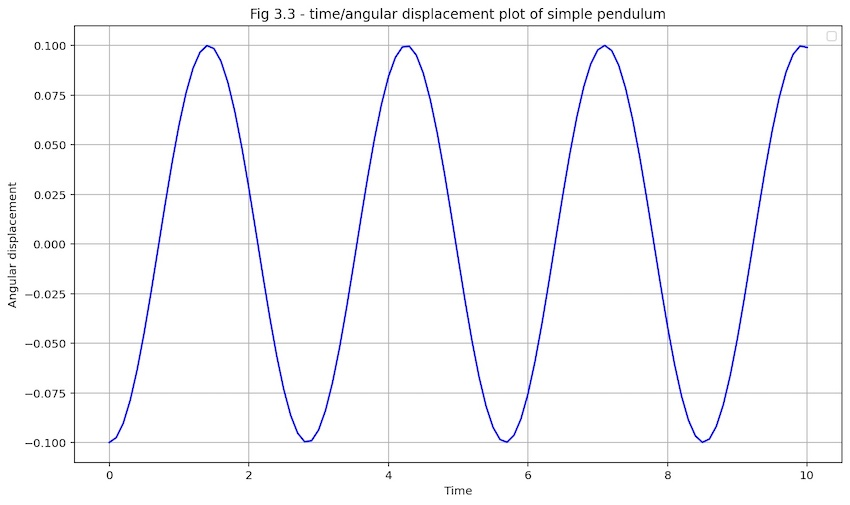
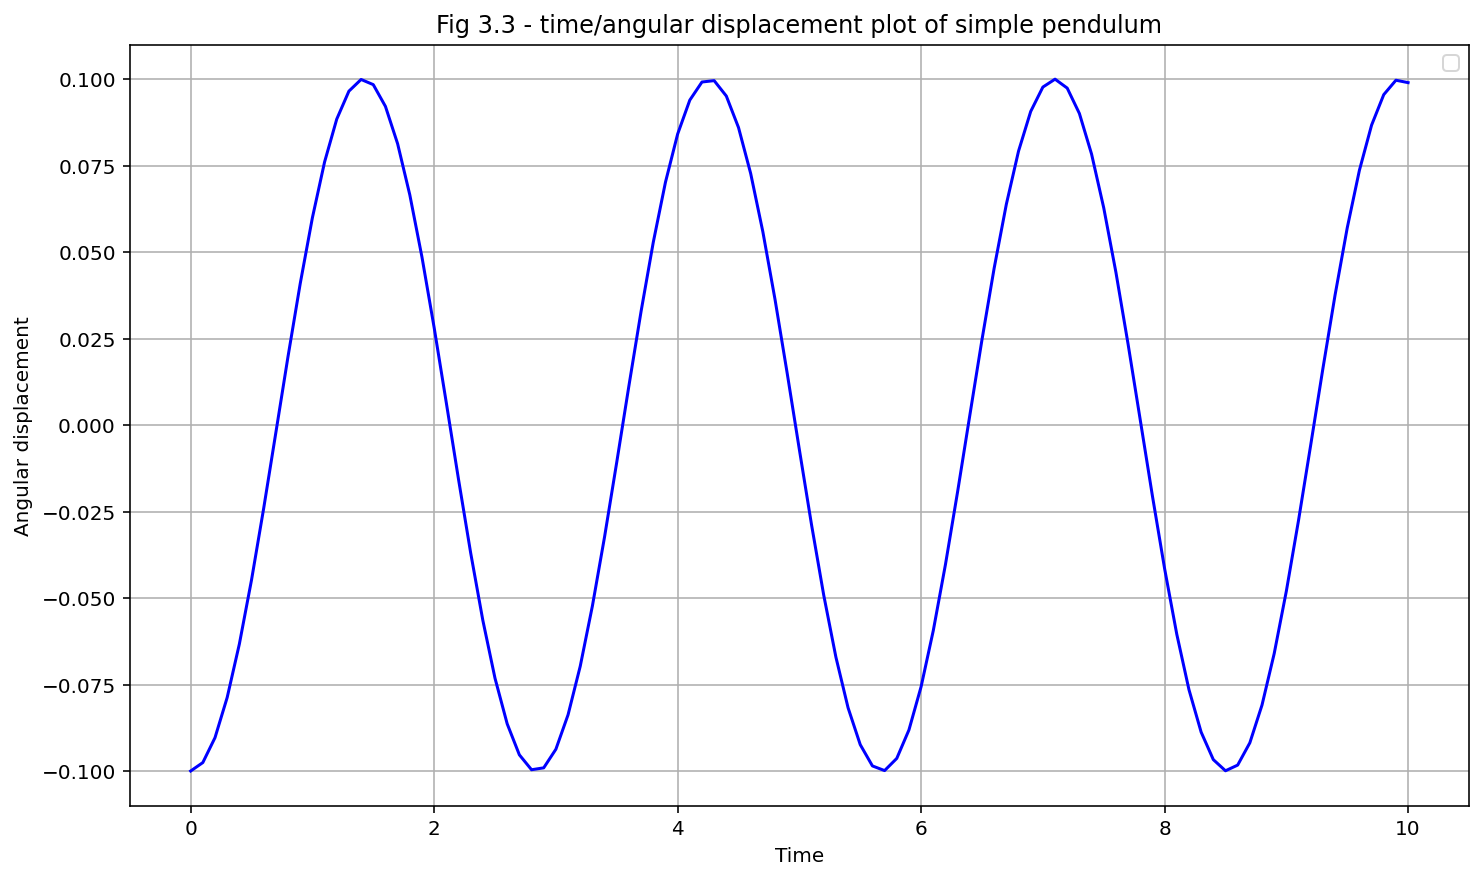
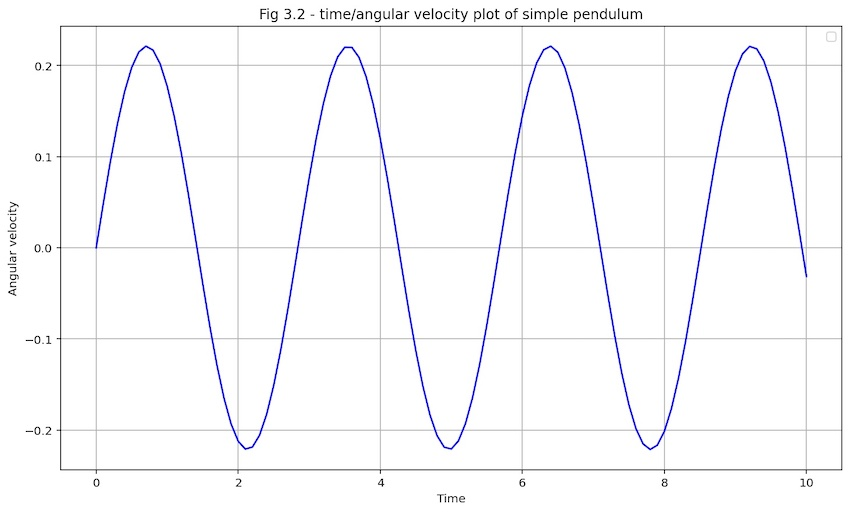
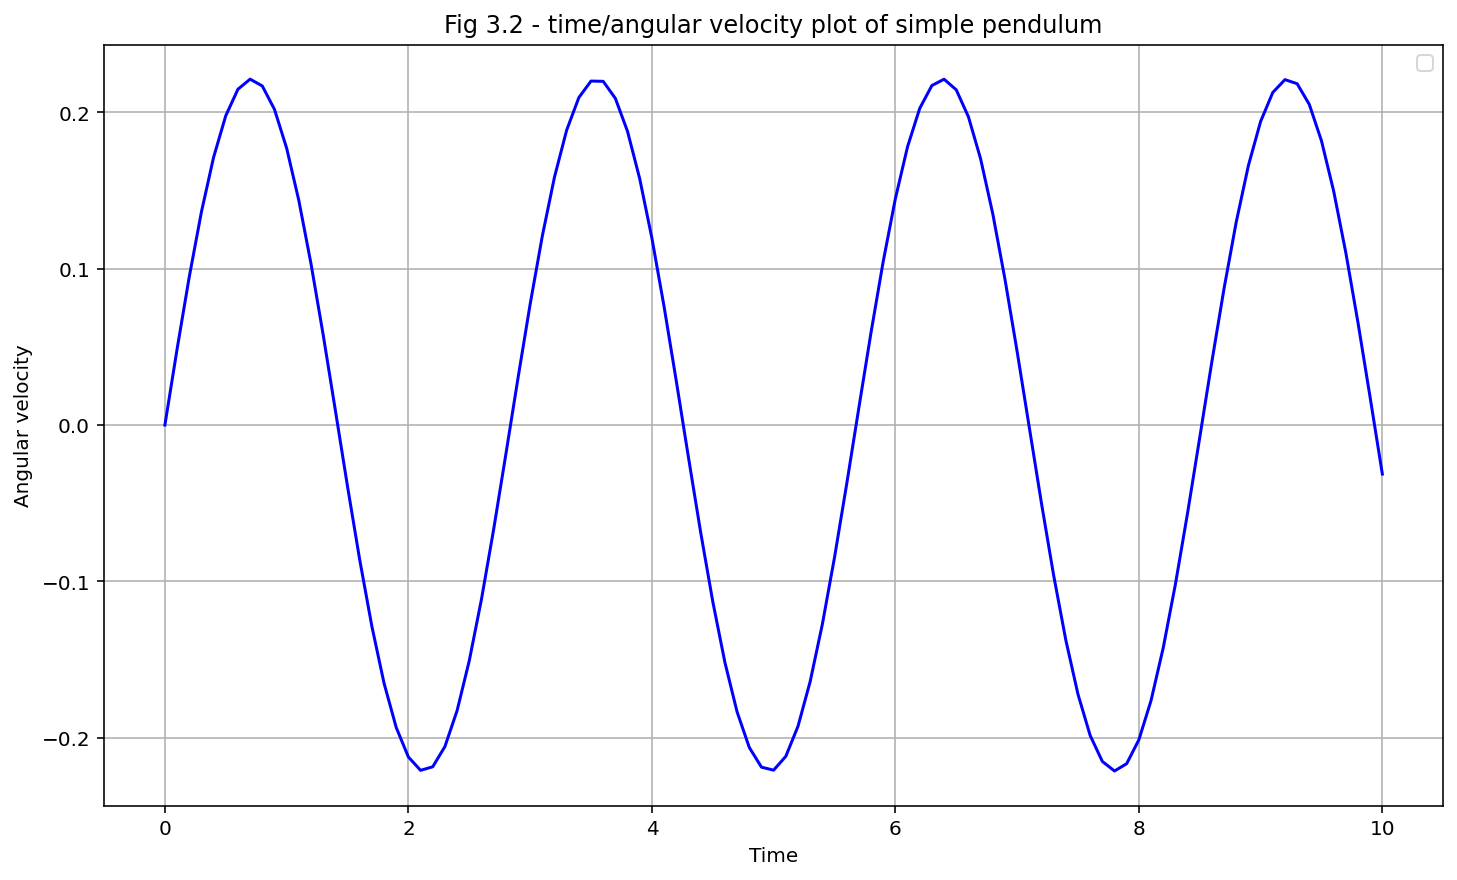

# 4 Methodological Details
## 4.1 Adapting onto Atwood System
### 4.1.1 The ODEs

The Swinging Atwood system is similar to the Simple Pendulum except we have more variables and two ODEs which need to be solved.

$$rθ''+2r'θ'+gsin(θ)=0$$
$$mrθ'²-Mg+mgcos(θ) = (M+m)r''$$

Like before, the same variables of $g$, $L$ and θ (with respect to time) still apply and three new variables are introduced:

- $M$ is the mass (kg) of (red) pendulum which moves vertically only
- $m$ is the mass (kg) of (blue) pendulum which moves chaotically
- $r$ is the length (metres) of string from right pulley to blue pendulum

We define two new variables, ω (like before) and $P$, to convert both ODEs above to first order differential equations. This gives us the four coupled ODEs below.

$$θ'(t)=ω(t)$$
$$ω'(t)=(\frac{1}{r(t)})(-g\times sin(θ(t))-2(Ρ(t)\times ω(t))$$


$$radius'(t)=Ρ(t)$$
$$Ρ'(t)=(1/(M+m))(m\times r(t)\times(ω(t)^2)-M\times g+m\times g\times cos(θ(t)))$$

### 4.1.2 The adapted code

We let y be the vector of θ, ω, $r$  and $Ρ$ within our new function of "Atwood".
Taking the derivative of y lets us solve the ODEs of the Atwood system.


```
def Atwood(y,t,M,m,g): 
    θ, ω, r, P = y
    dydt = [ω, (1/r)*(-g*(np.sin(θ))-2*(P*ω)), P, (1/(M+m))*(m*r*(ω**2)-M*g+m*g*(np.cos(θ)))]
    return dydt
```
We then set our intial condition within the vector of $y_{0}$. The columns of the vector $y_{0}$ follows the same layout as the vector y. So,
$y_{0}$ = [θ, ω, r, P]
```
y_0 = [np.pi/2 ,0 ,1 ,0]
```
The code below using linspace takes 101 data points between 0 to 10 seconds.
```
t = np.linspace(0,10,101)
```
We call 'odient' to  solve the Atwood function for all the variables in our vector y. Our solutions are called "sul".
```
sul = odeint(Atwood, y0, t, args=(M,m,g))
```
This code allows us to plot graphs for different variables from our Atwood function. The phase plot of the Atwood system would be given by this code.

```
plt.plot(sul[:, 2], sul[:, 1], 'b', label='Phase plot')
plt.grid()
plt.show()
```

## 4.2 Visualising the motion of the swinging pendulum in the Atwood system
A phase plot is a graph of angular velocity against angular displacement both with respect to time.

We chose Phase plots to display our results from Atwood's swinging pendulum because it gives the best geometric representation of the pendulum's trajectory. In the case of our defined system, it can show the progression of angular velocity and angular displacement with respect of time. These are the two variables we are most concerned with because it can help us analyse the motion of the simple pendulum. If we wanted to include additional factors such as damping forces, we could also see how they affect the overall motion of the swinging pendulum using a phase plot.

# 5 Results
## 5.1 Which variables to investigate

Changing the initial conditions of the Atwood system resulted in a very different Phase plot each time. We investigated how all the possible initial conditions could give us different Phase plots. The variables we manipulated in the system were the mass of the pendulum and counterweight, the initial angular displacement and the initial radius 'r' of the pendulum to the pulley. We did not investigate the initial angular velocity and change in radius because the pendulum was released from rest.

Changing the mass of the pendulum and counterweight gave the most interesting results in Phase plots which we were able to classify.

## 5.2 Mass-ratio variable and Classifying Orbits
### 5.2.1 Singular orbits

This section will examine the results obtained when we changed the mass ratio of the Atwood system, where the mass ratio:
$$μ=M/m$$
Fig 6 is a phase plot of the Atwood system when $μ$=1.

The ellipses starts at the RHS of the graph at ($π$/2,0) because the pendulum was released from rest at an angle of $π$/2 from its vertical equilibrium position. The ellipses creates a single loop which eventually concentrates at a single point (0,0), picking up and loosing angular velocity/angular displacement with respect to time. At (0,0), we know that the pendulum has resided back to its equilibrium position. We can classify this phase plot as a singular orbit. A singular orbit is not observed for any larger values of $μ$. Regardless of the initial conditions of the system (i.e angular displacement, angular velocity, radius or change in radius) when $μ$=1, a singular phase plot is always made.

When $μ$=1, the pendulum and counterweight of the system are of equal masses. This means that both masses are in phase with each other which consequently produces this uniquely simple phase plot where there are not many paths of motion seen. This implies that the pendulum quickly stops moving after being released compared to other phase plots with concentrated trajectories.

```
Figure 6, phase plot for μ = 1: 
```

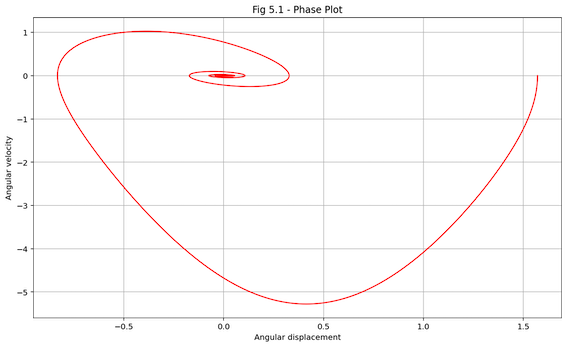
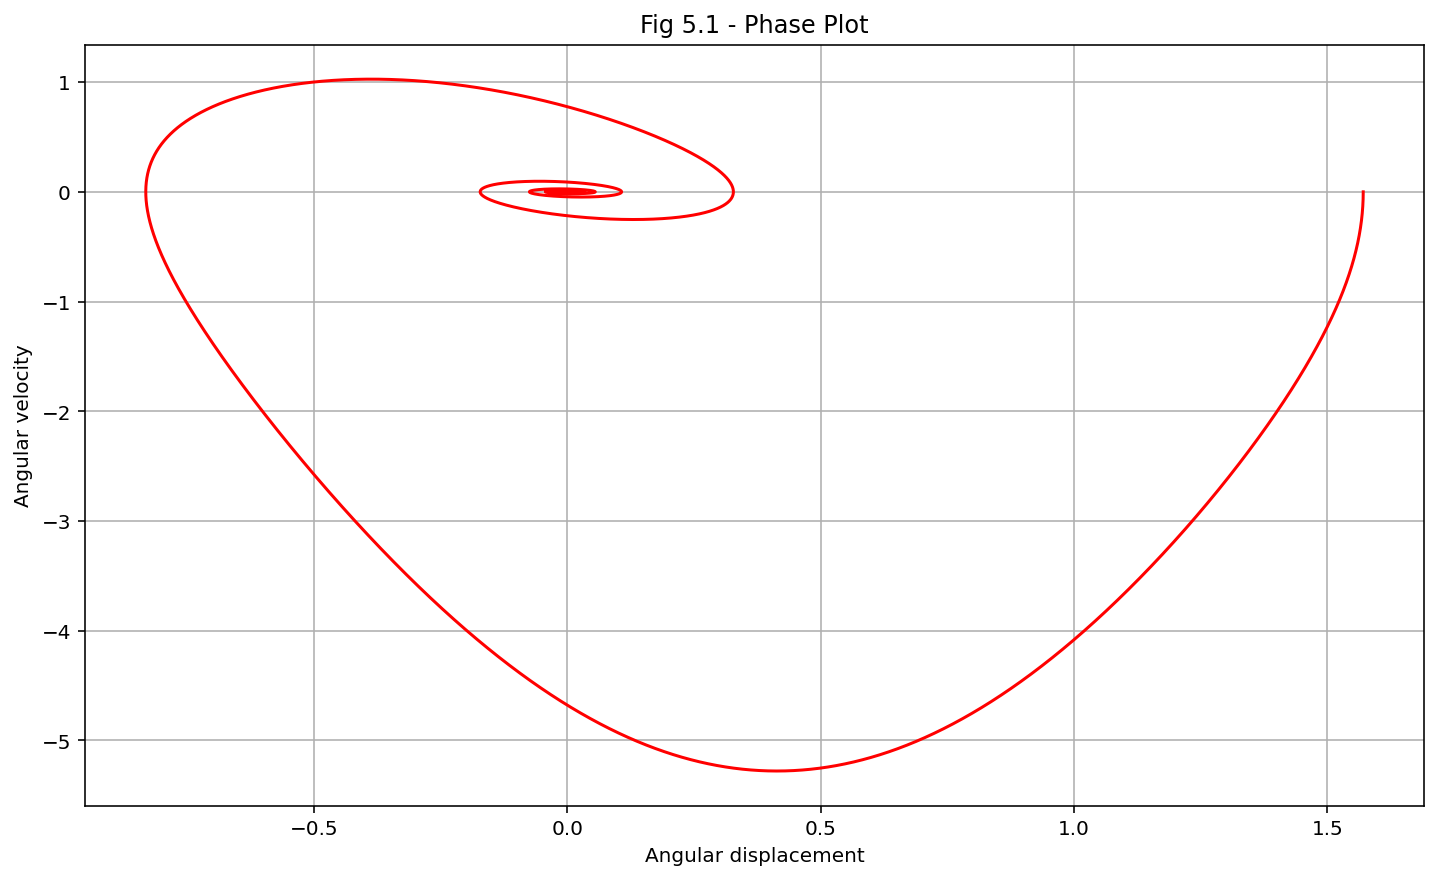

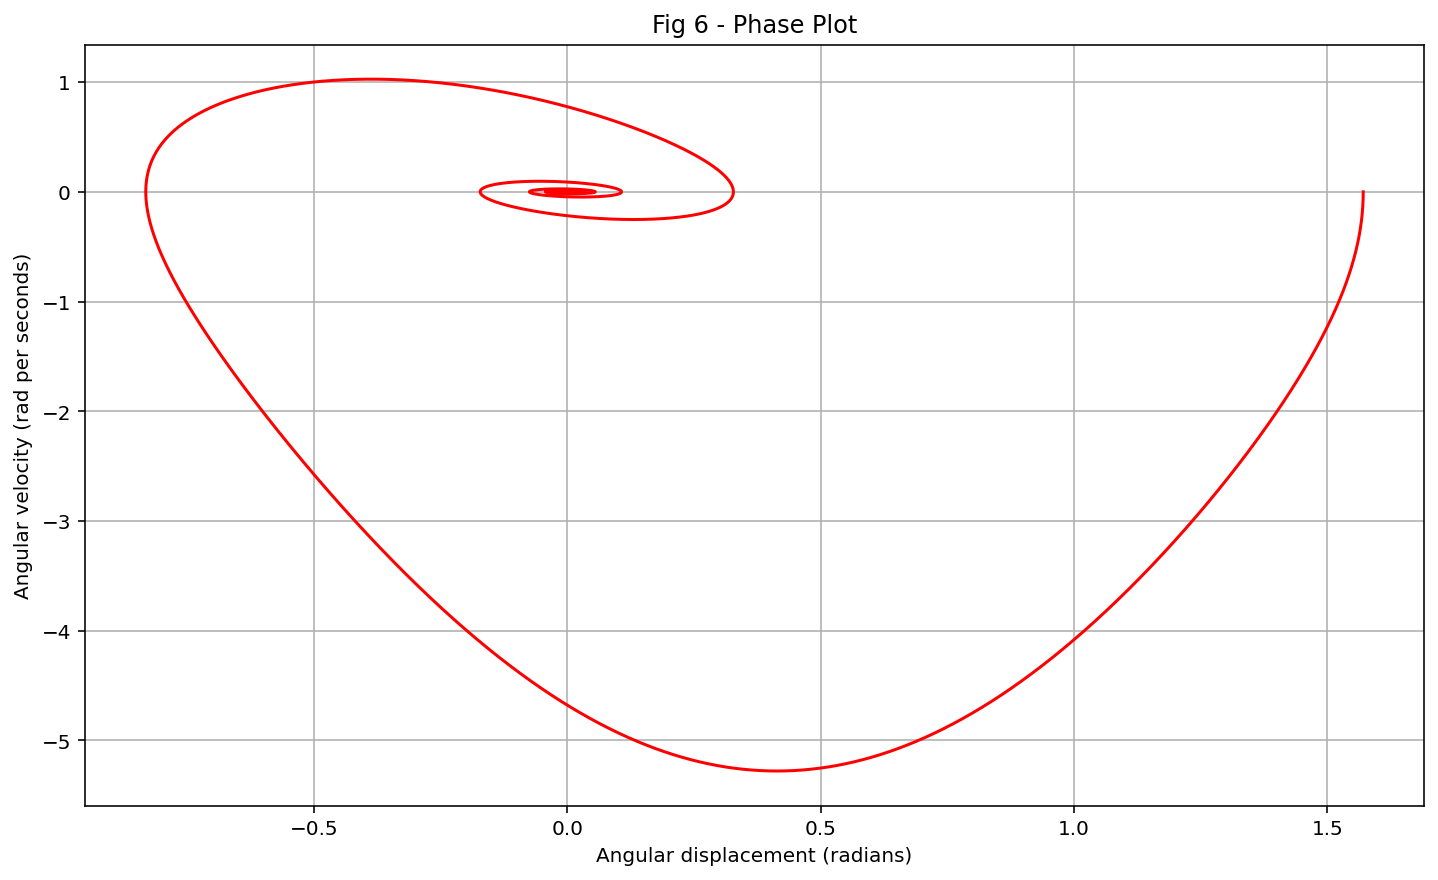

In [2]:
import phasePlot6

### 5.2.2 Non-singular orbits

Here,  a non-singular orbit is made. The symmetries and patterns in the ellipses is more clear. A large part of the ellipses resides on the negative axis of angular displacement even going beyond 2$π$. This indicates that the pendulum is rotating in a clockwise direction and in time, creates one full revolution around the pulley. The elliptical graphs are also multivariate functions. This means that at different values of angular displacement, the pendulum can take different values of angular velocity. This can also be seen in the fact that the graph is symmetrical about the x-axis, indicating that for any angular displacement, the pendulum can have either a positive or negative angular velocity.

Fig 7 shows more trajectories of the pendulum on the phase plot which makes it appear more complex than Fig 6. This is due to the pendulum mass (m) and counterweight mass (M) being different, causing the pendulum to display motion for a longer time.
```
Figure 7 is a phase plot of the Atwood system when μ = 6: 
```

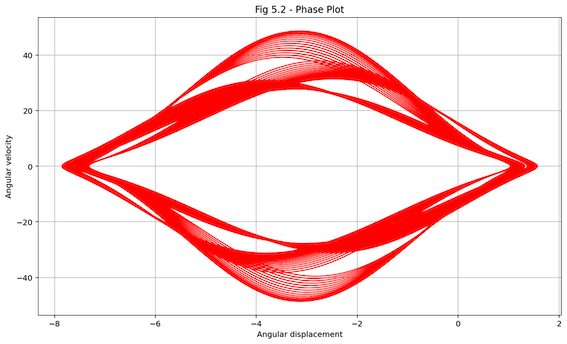
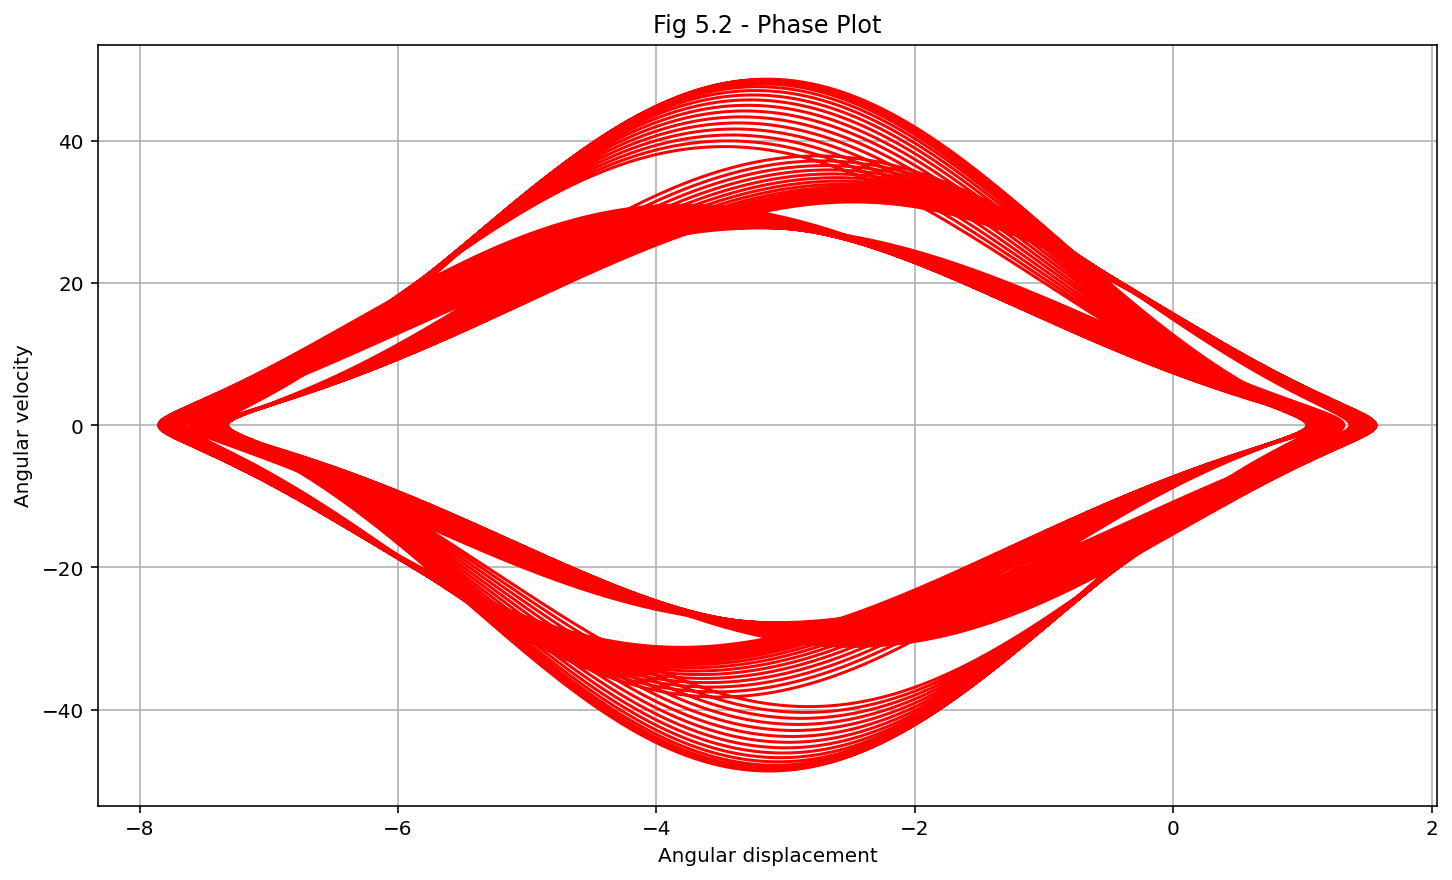

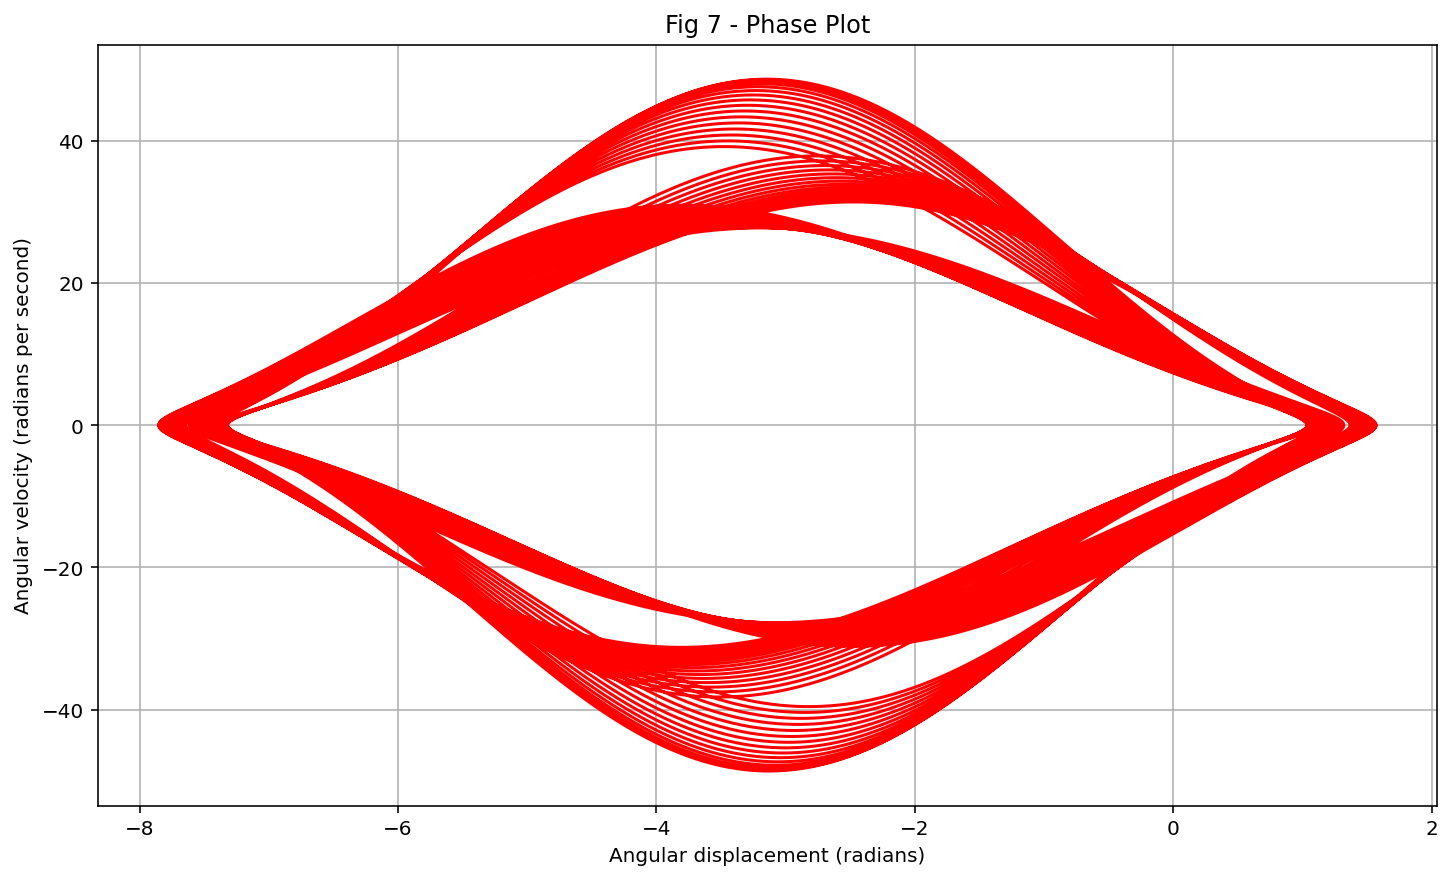

In [3]:
import phasePlot7

A non-singular orbit is again created. If we were to increase the mass ratio to a much larger value, the values of angular velocity and displacement increase accordingly to much larger values as well. The elliptical graph spans from 0 to beyond 4$π$ suggesting the pendulum makes at least 2 revolutions around the pulley when released from its initial position. The graph is also a multivariate function suggesting that the pendulum can take multiple angular velocity values at specific values of θ.

```
Figure 8, phase plot for μ = 19: 
```
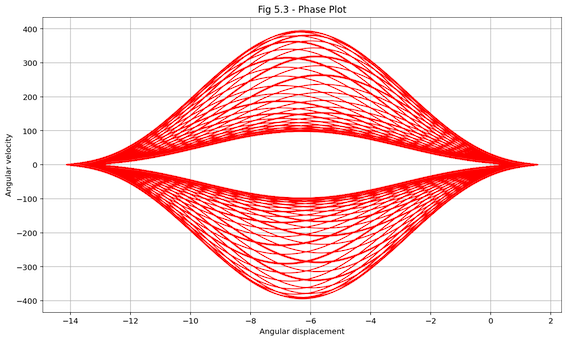
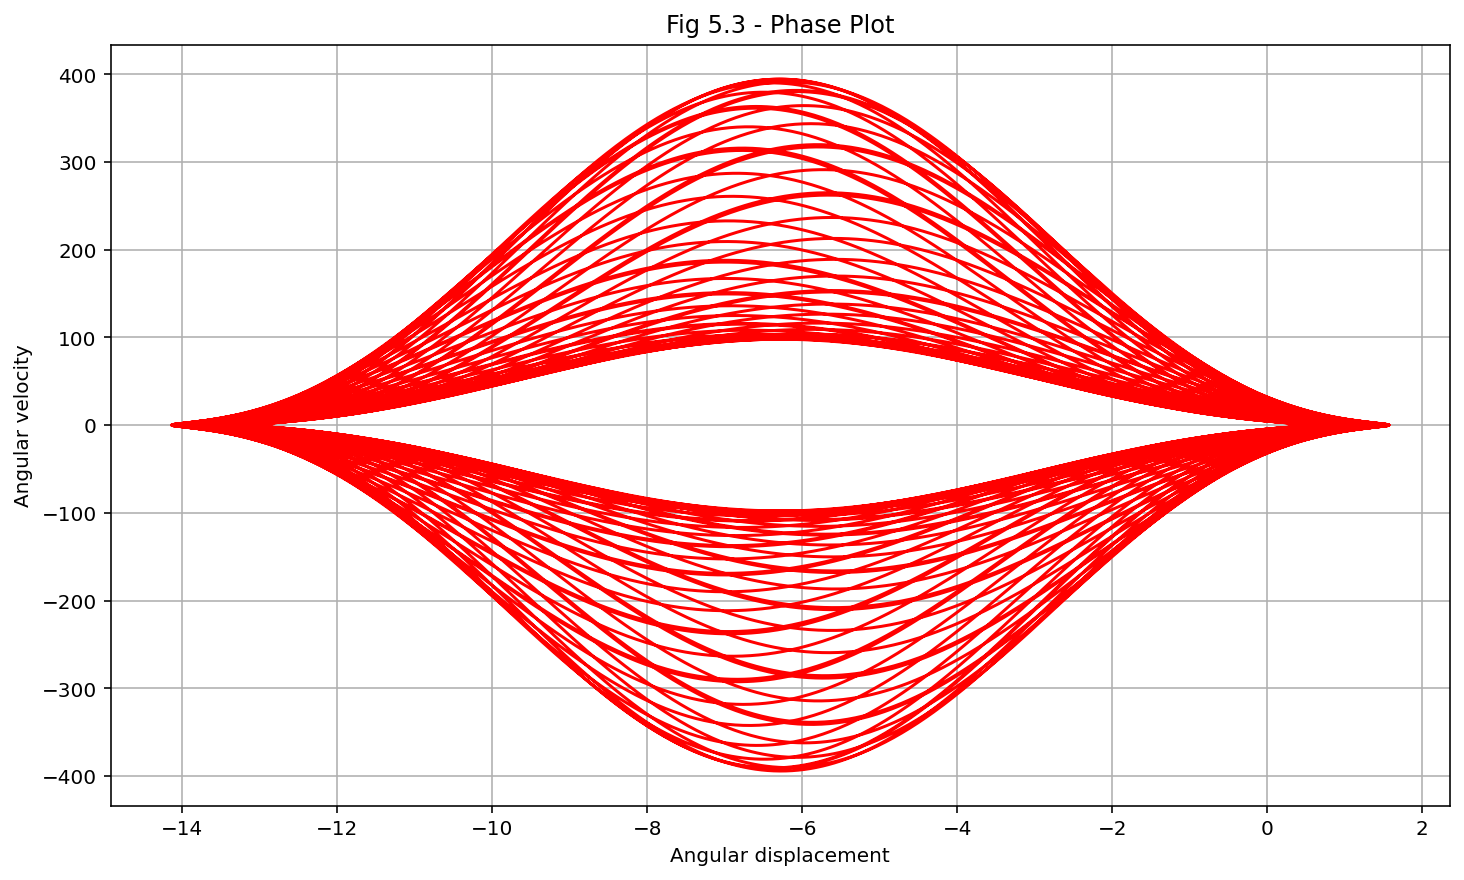

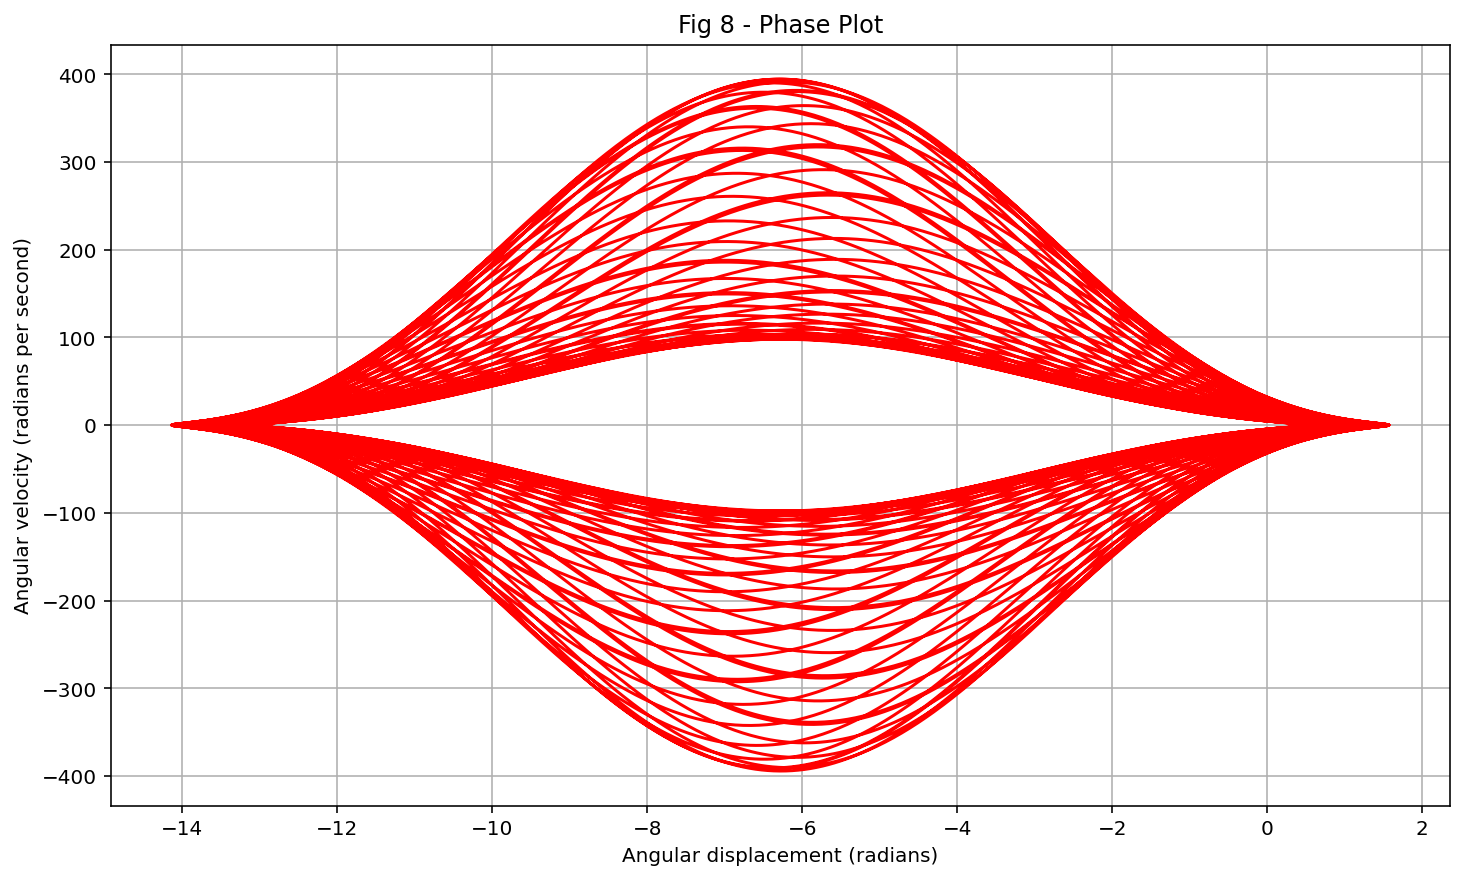

In [4]:
import phasePlot8

### 5.2.3 Chaotic Orbits

Certain values of μ result in chaotic motion. There is no clear pattern within this graph nor are there clear patterns in other graphs which also show chaotic motion. Chaotic motion in the Atwood system arises when the counterweight moves at a certain frequency because resonance is achieved. At resonance, the pendulum's motion is greatly amplified creating a non-periodic phase plot with unpredictable patterns.

```
Figure 9, phase plot for μ = 9: 
```

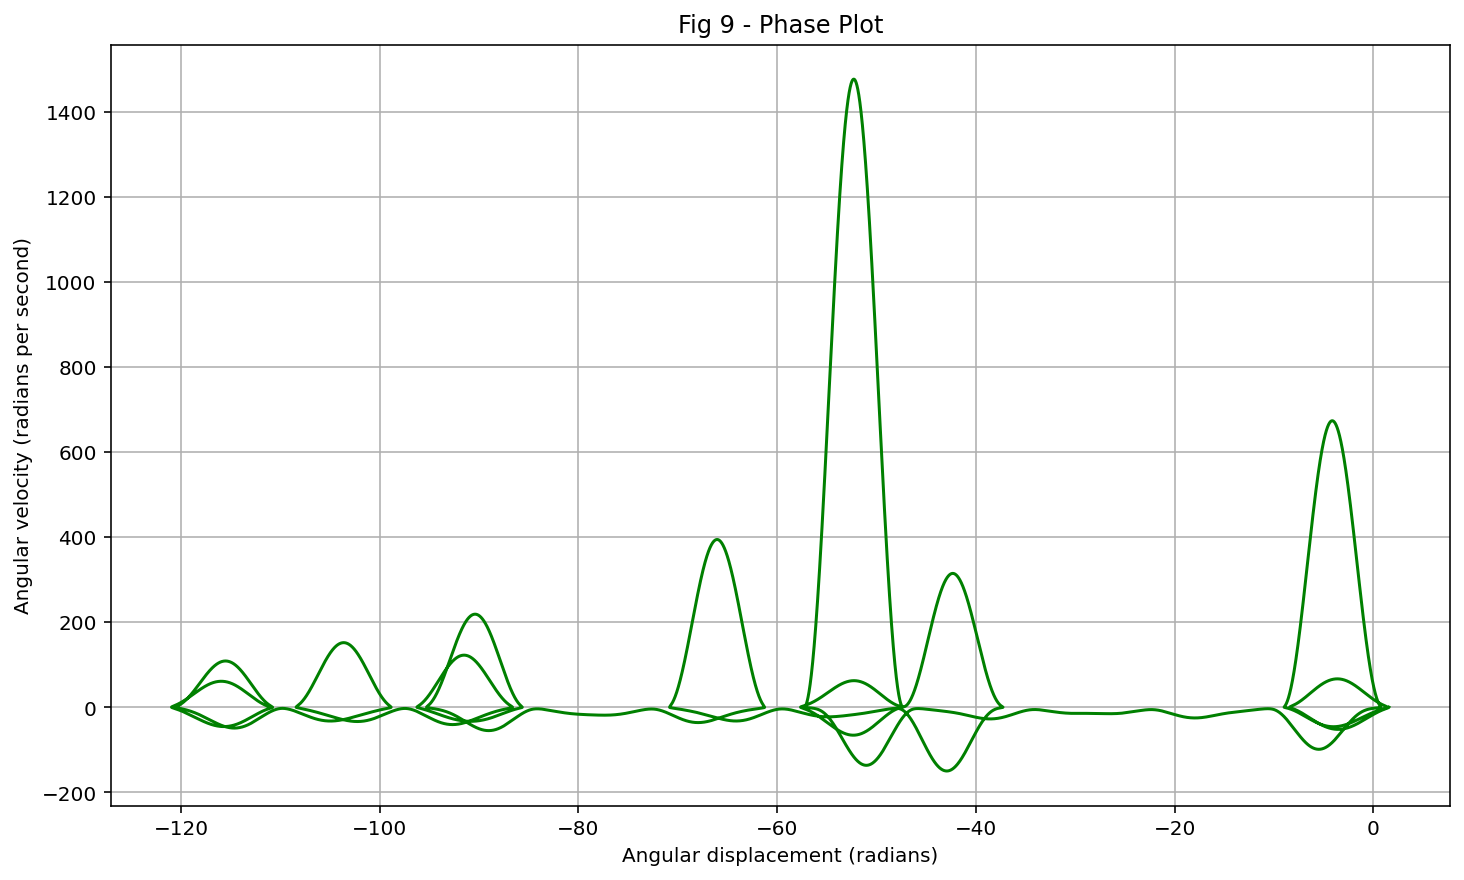

In [5]:
import phasePlot9

Figure 10 displays multiple sudden spikes of angular velocity everywhere on the graph that differ massively with small changes of μ.
```
Figure 10, phase plot of three different systems showing chaotic motion: 
```

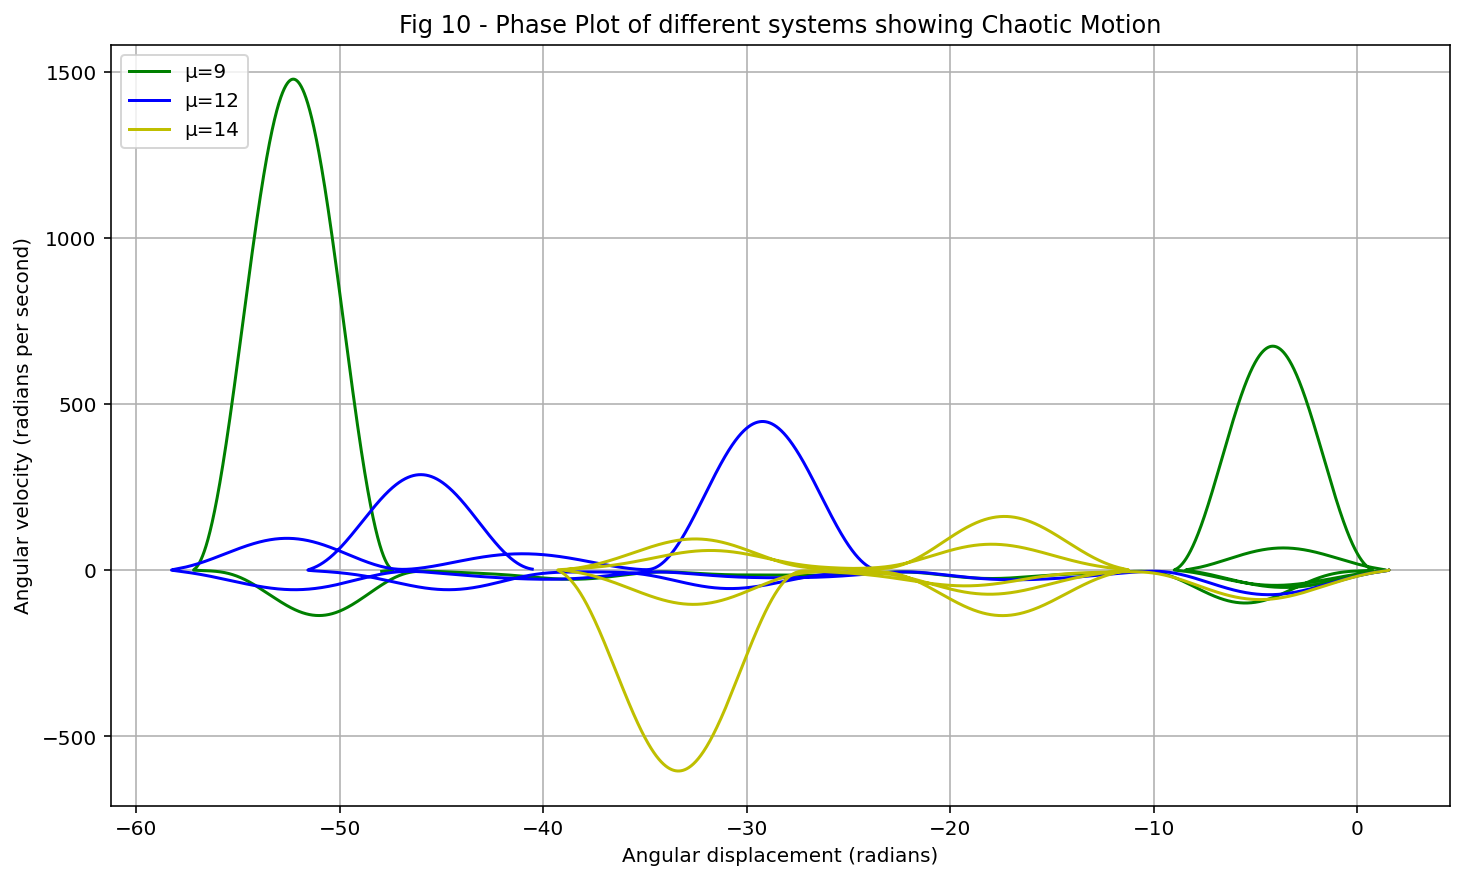

In [6]:
import phasePlot10

### 5.2.4 Periodic Orbits

When the components of the swinging Atwood system (counterweight and pendulum) are in phase with each other, the system can neatly transfer potential energy into kinetic energy and kinetic energy to potential energy in a continual loop (assuming no damping forces). This results in the pendulum exhibiting periodic motion which can be seen on a phase plot as a periodic orbit.

Figure 3 shows the periodic orbit of a simple pendulum.

Phase plots like figure 11 show periodic orbits because it clearly maps out a singular path and it does not spiral like singular orbits. The orbit has no clear start or end point (it's a continuous loop) suggesting that the pendulum repeatedly follows one route within given intervals of time and doesn't stray from the established pathway like non-singular orbits. The orbit is also predictable unlike chaotic orbits.

```
Figure 11, phase plot for μ = 2.394: 
```

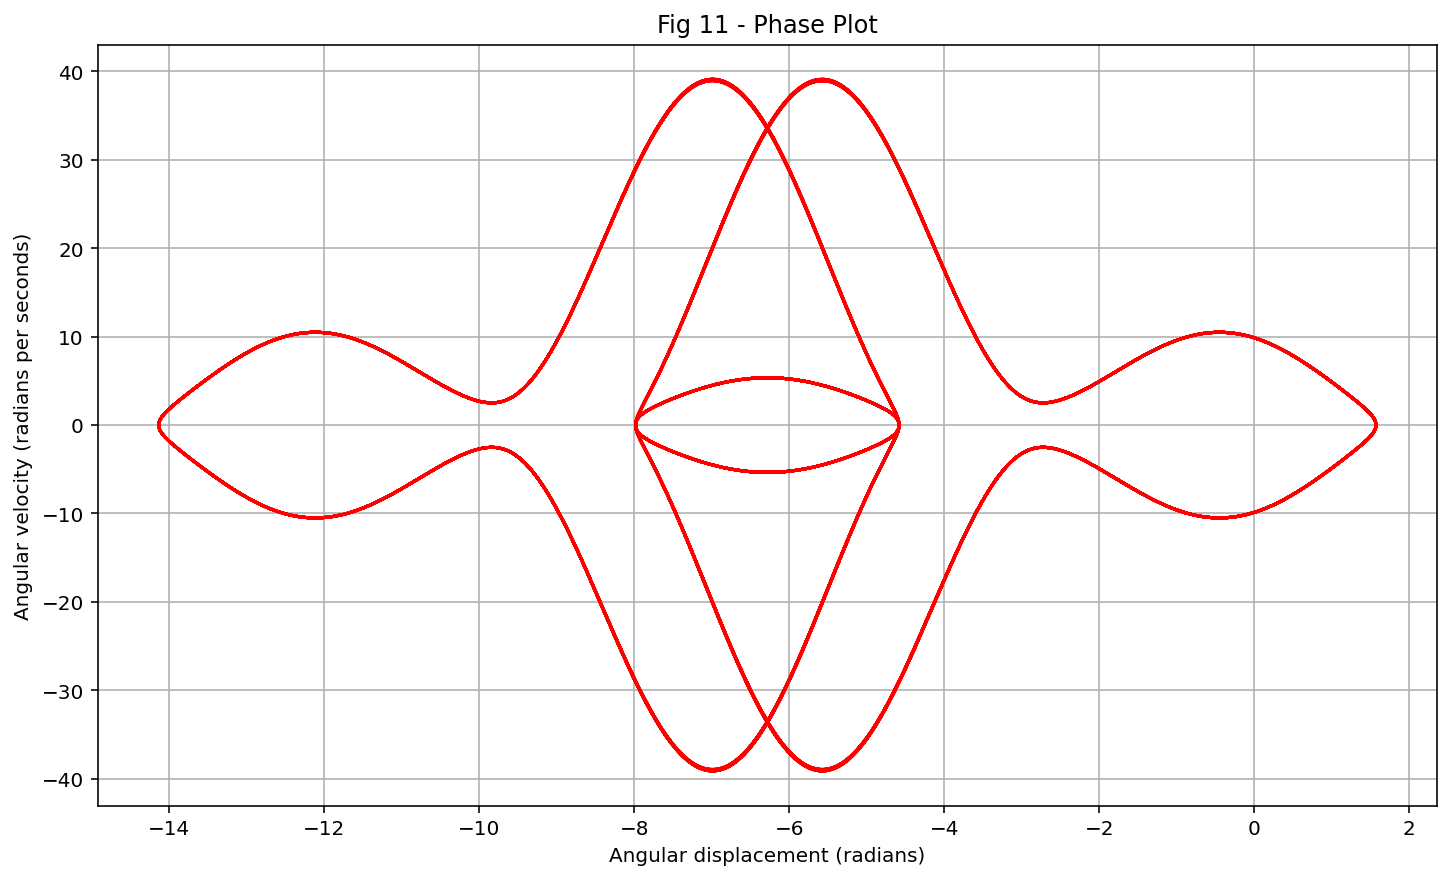

In [7]:
import phasePlot11

## 5.3 Sensitivity to initial conditions

A distinctive feature of chaotic system is sensitivity to initial conditions. Just by increasing the θ value of $y_{0}$ by 10%.

from

```
y = [np.pi/2 ,0 ,1 ,0]
```

to

```
y = [(1.1*np.pi)/2 ,0 ,1 ,0]
```
We plotted 2 graphs on the same plot so that it's easier to compare the differences which result from the 2 sets of initial conditions.
```
Figure 12, phase plot for μ = 10 showing the set initial condition and adjusted initial conditions: 
```

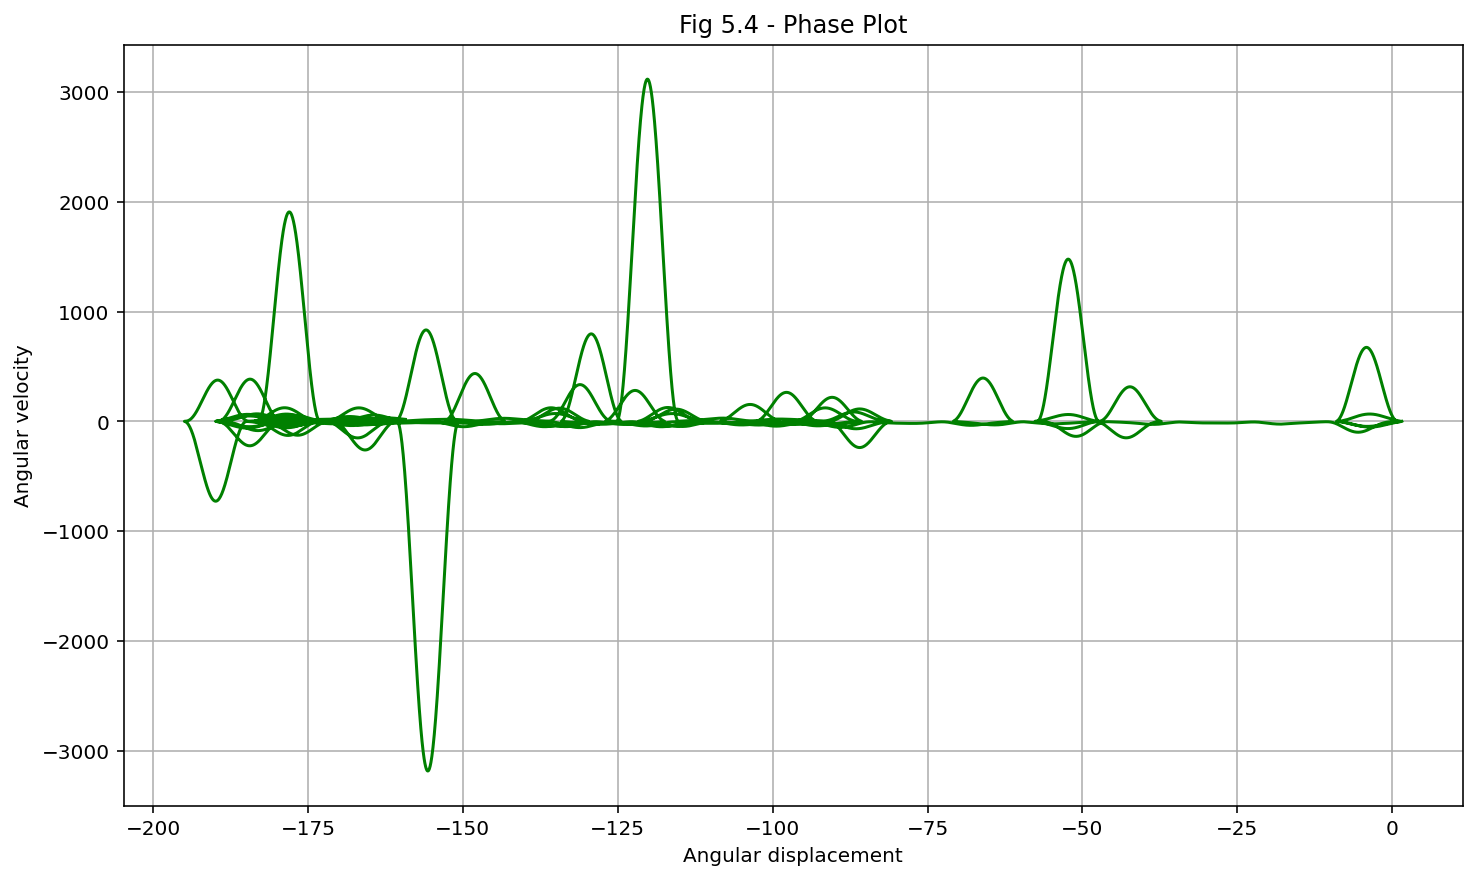
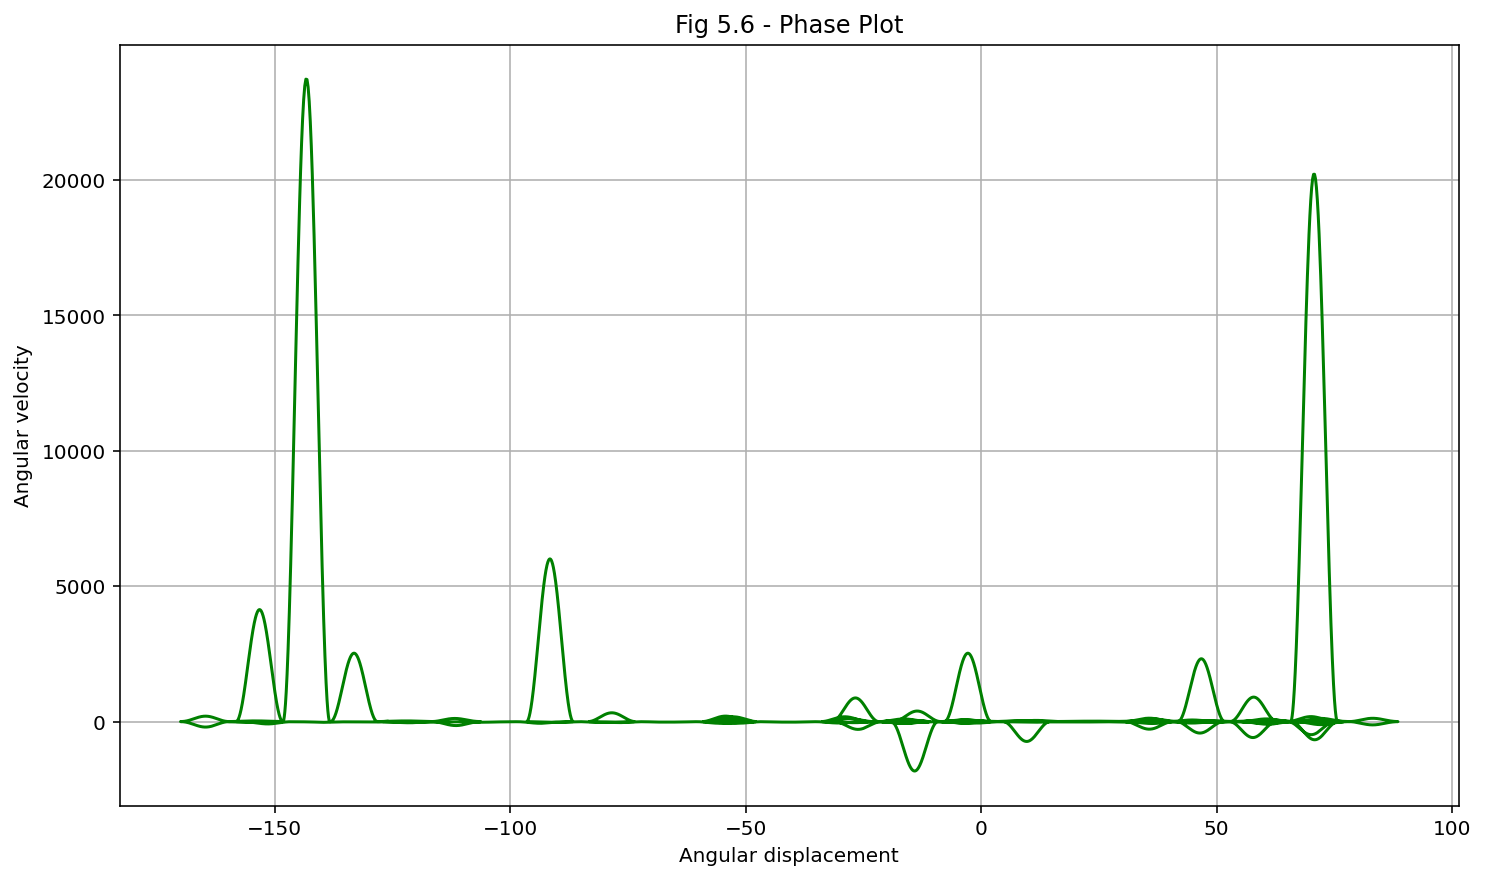

In [8]:
import phasePlot12

## 5.4 Locating chaotic motion

We identified chaotic motion through testing for sensitivity to initial conditions, allowing us to distinguish this from random motion. Using trial and error, we found that for mass-ratio values up to and including $μ = 8.18$, the system displays periodic harmonic motion. Using trial and error while increasing μ, we found the scope of chaotic motion occurred within $8.18 < μ < 14.73$.  After this, the system returns to periodic motion. The four figures below indicate our findings. 


```
Figure 13, phase plot for μ = 8.18:                                               Figure 14, phase plot for μ = 8.19:                   
```

<img src="fig13,14.png" width="1300"/>  


Figures 13 and 14 above show that the motion must change from periodic to chaotic when $8.18 < μ < 8.19$ since when $μ = 8.18$, Figure 13 displays periodic motion and when $μ = 8.19$, Figure 14 shows clear chaotic motion due to the random spikes in angular velocity . We could have gone further than two decimal places within this interval to find a more accurate mass-ratio value at which motion changes from harmonic to chaotic, but we stopped investigating there due to the scope of the project. 
   
```
Figure 15, phase plot for μ = 14.72:                                             Figure 16, phase plot for μ = 14.73: 
```
<img src="fig15,16.png" width="1300"/>  

Figures 15 and 16 show that the motion returns to periodic when $14.72 < μ < 14.73$ since when $μ = 14.72$, Figure 15 continues displaying random spikes in angular velocity, indicating chaotic motion but when $μ = 14.73$, Figure 16 shows a return to periodic motion.

The purpose of changing the mass ratios at such small increments is to show how dynamical systems are highly sensitive to initial conditions. Small changes in one state can result in a drastically different state during a later phase in this experiment. This results is commonly known as the butterfly effect.
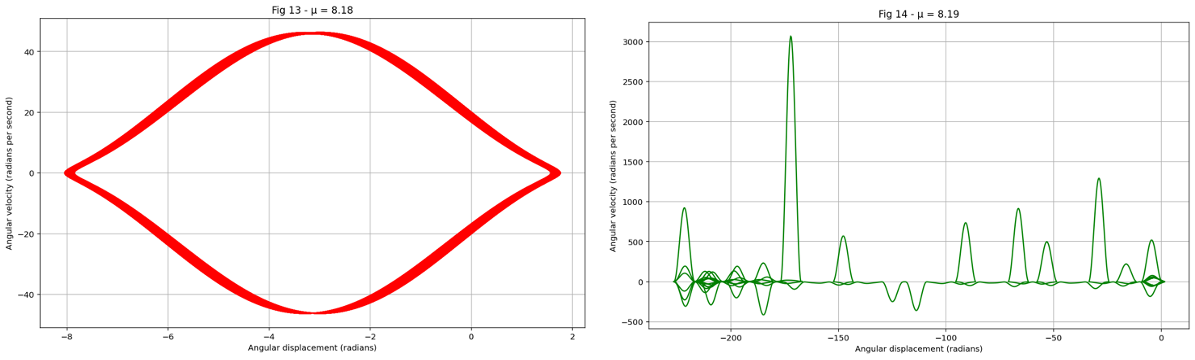

# 6 Discussion and Conclusions

### 6.1 Summary of Conclusions

Through utilising the package 'odient' in python, we successfully managed to create phase plots to model the motion and satisfy the ODEs of the swinging Atwood system. This enabled us to explore complex chaotic motion through modifying the initial conditions and mass-ratio of the system as well as classify different types of orbits which appear on our phase plots. Additionally, we also found that changing the initial condition by incremental amounts caused a large difference in the phase plots produced. This fact is what separates chaotic motion from random motion. We used this to successfully identify at what values the system becomes chaotic and when it returns to periodic motion, which is $8.18 < μ < 14.73$.

### 6.2 What else could we have explored

Due to the time constraints on this project, the scope of the project was limited to some extent. After some experimentation with changing all the possible initial conditions, we decided to focus on exploring the effects of changing the mass-ratio because it displayed a larger variety of phase plots. If we had more time, exploring in depth the effects of changing the initial angular displacement and the radius of the pendulum from the pulley would be a possibility. We would have been able to investigate the chaotic motion at specific length and angular values in the same way we found it here with some mass-ratio values, using the same model.
We could also have explored the effect of air resistance on the model, but due to the complex nature of this variable we decided to eliminate its effect in order to simplify the model.

# 7 Bibliography

En.wikipedia.org. n.d. Swinging Atwood's machine - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Swinging_Atwood%27s_machine> [Accessed 10 February 2022].

Hplgit.github.io. n.d. Using Pysketcher to Create Principal Sketches of Physics Problems. [online] Available at: <http://hplgit.github.io/pysketcher/doc/pub/tutorial/._pysketcher003.html> [Accessed 6 February 2022].
